## Remove warnings for clean and presentable output.

In [169]:
import warnings
warnings.filterwarnings("ignore")

### Import Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Application Dataset

In [126]:
appl= pd.read_csv(r"/content/drive/MyDrive/Credit EDA Case Study/application_data.csv")

In [127]:
appl.shape

(307511, 122)

## Count columns which are containing more that 50 percent null values

In [128]:
temp=appl.isnull().sum()
temp=temp[temp.values>(0.5*len(temp))]
len(temp)

64

Drop Columns found in previous 

In [129]:
temp= list(temp[temp.values>=0.5].index)
appl.drop(labels=temp,axis=1,inplace=True)
print(len(temp))

64


## Check remaning columns with null values

In [130]:
appl.isnull().sum()/len(appl)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


## 3 Defective Columns Found:


1.   AMT_ANNUITY
2.   CNT_FAM_MEMBERS
2.   DAYS_LAST_PHONE_CHANGE  

## Analysis for AMT_ANNUITY



In [131]:
print(appl['AMT_ANNUITY'].head)
print("..................................................\nMedian: ",appl['AMT_ANNUITY'].median(), " | Mean:", appl['AMT_ANNUITY'].mean())

<bound method NDFrame.head of 0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64>
..................................................
Median:  24903.0  | Mean: 27108.573909183444


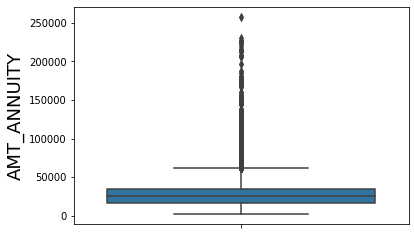

In [132]:
sns.boxplot(y=appl['AMT_ANNUITY'])

## Conclussion for AMT_ANNUITY 
Column contains Outliers hence median can be used to fill missing value





In [133]:
value=appl['AMT_ANNUITY'].median()
appl.loc[appl['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=value

In [134]:
appl.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

## Analysis for CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE 

In [135]:
print(appl['CNT_FAM_MEMBERS'][appl['CNT_FAM_MEMBERS'].isnull()])
print(".......................................\n")
print(appl['DAYS_LAST_PHONE_CHANGE'][appl['DAYS_LAST_PHONE_CHANGE'].isnull()])

41982    NaN
187348   NaN
Name: CNT_FAM_MEMBERS, dtype: float64
.......................................

15709   NaN
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


## Conclusion for CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE
Blank cells can not be filled with derived data. These rows should be removed.

In [136]:

print("Before Dropping:\n", appl.count(), "\n......................................................\n ")
appl.dropna(subset = ["CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE"], inplace=True)
print("After Dropping:\n",appl.count())

Before Dropping:
 SK_ID_CURR                     307511
TARGET                         307511
NAME_CONTRACT_TYPE             307511
CODE_GENDER                    307511
FLAG_OWN_CAR                   307511
FLAG_OWN_REALTY                307511
CNT_CHILDREN                   307511
AMT_INCOME_TOTAL               307511
AMT_CREDIT                     307511
AMT_ANNUITY                    307511
NAME_INCOME_TYPE               307511
NAME_EDUCATION_TYPE            307511
NAME_FAMILY_STATUS             307511
NAME_HOUSING_TYPE              307511
REGION_POPULATION_RELATIVE     307511
DAYS_BIRTH                     307511
DAYS_EMPLOYED                  307511
DAYS_REGISTRATION              307511
DAYS_ID_PUBLISH                307511
FLAG_MOBIL                     307511
FLAG_EMP_PHONE                 307511
FLAG_WORK_PHONE                307511
FLAG_CONT_MOBILE               307511
FLAG_PHONE                     307511
FLAG_EMAIL                     307511
CNT_FAM_MEMBERS                3

## Remove extra columns

In [137]:
remove=[
        'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_MOBIL','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

appl.drop(labels=remove,inplace=True,axis=1)


## Categorical Columns:
1. Gender
2. Organization

Find NA values

In [138]:
print("NA in Gender:", appl[appl['CODE_GENDER']=='XNA'].shape)
print("NA in Organization:", appl[appl['ORGANIZATION_TYPE']=='XNA'].shape)
print("......................\n")
print(appl['CODE_GENDER'].value_counts())
print("\n......................\n")
print(appl['ORGANIZATION_TYPE'].value_counts())

NA in Gender: (4, 28)
NA in Organization: (55374, 28)
......................

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

......................

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries    

## Updating NA Gender to F, as it will not affect dataset because of small quantity.

In [139]:
appl.loc[appl['CODE_GENDER']=='XNA','CODE_GENDER']='F'
appl['CODE_GENDER'].value_counts()

F    202451
M    105057
Name: CODE_GENDER, dtype: int64

## Analysis on Organinization

In [140]:
appl['ORGANIZATION_TYPE'].describe()

count                     307508
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

## Treament for organization
Out of 307508 there are 55374 records with NA value. This is 18 % of total data which can be dropped with out having major impact on dataset.

In [141]:
appl=appl.drop(appl.loc[appl['ORGANIZATION_TYPE']=='XNA'].index)
print("Rows with NA values in Organization column:", appl[appl['ORGANIZATION_TYPE']=='XNA'].shape[0])

Rows with NA values in Organization column: 0


### Treatment: Typecast into integer.
*IT is a obervation that some numeric columns are present as string in dataframe.*



In [142]:
temp=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

appl[temp]=appl[temp].apply(pd.to_numeric)
appl.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government


## Creating Bins:
This helps in analysis process

In [143]:
#Income range
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
appl['AMT_INCOME_RANGE']=pd.cut(appl['AMT_INCOME_TOTAL'],bins,labels=slot)

In [144]:
#Credit Ammount
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

appl['AMT_CREDIT_RANGE']=pd.cut(appl['AMT_CREDIT'],bins=bins,labels=slots)

## Creating two seperate dataframes: 
1 - customers with payment difficulties 

0 - customers without payment difficulties

In [145]:
df0=appl.loc[appl["TARGET"]==0]
df1=appl.loc[appl["TARGET"]==1]

In [146]:
# Imbalance Pecentage
round(len(df0)/len(df1),2)

10.55

## Function to plot graphs with single call

In [147]:
def plotit(df,col,title,hue =None):
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    plt.show()

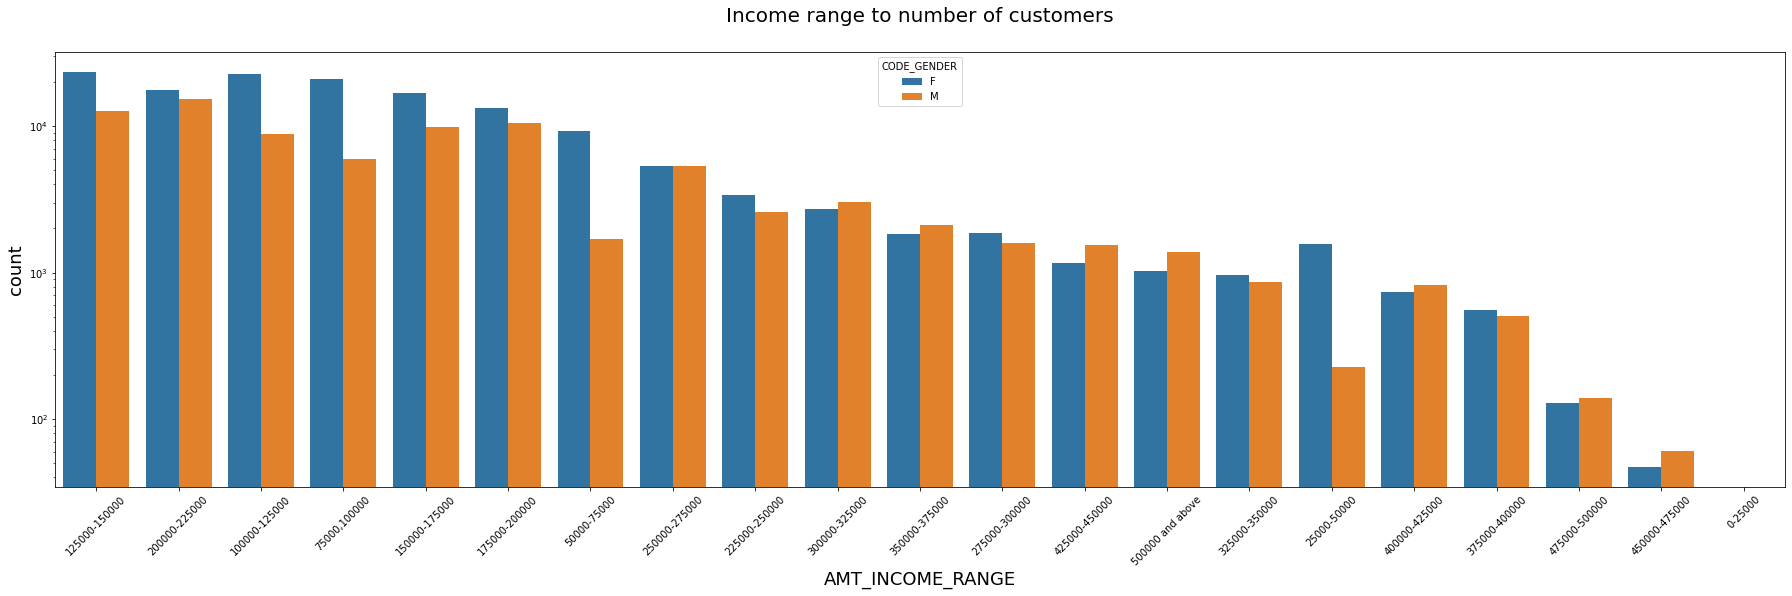

In [148]:
plotit(df0,col='AMT_INCOME_RANGE',title='Income range to number of customers',hue='CODE_GENDER')

**Points to note:**

1. Count of female is more than that of males
2. Income range decreases when income count is decreased. However, this looks like coincident. 
3. 100000 to 200000 income range holds majority of counts.
4. Females are having more credits than men.
5. Very less count for income range 500000 to 0.

## Income type

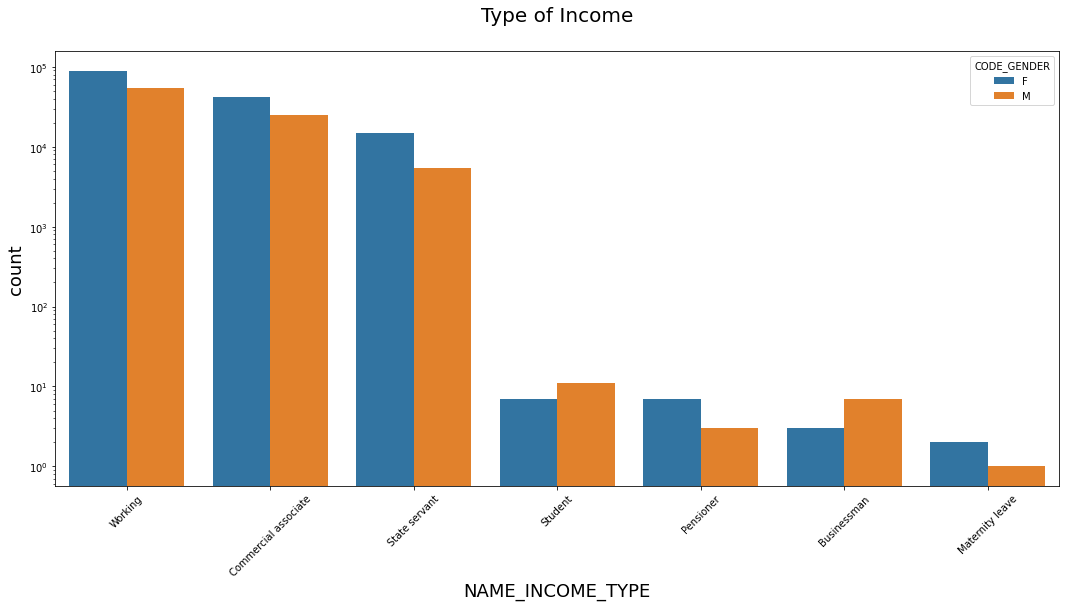

In [149]:
plotit(df0,col='NAME_INCOME_TYPE',title='Type of Income',hue='CODE_GENDER')

**Points to note**

1. 'working', 'commercial associate', and 'State Servant' have more credits than others
2. For above 3 and 'maternity leave',pensioner females are having more credits for rest males are having more credits. 
3. For 'Students', 'Pensioner,'Businessman','Maternity Leave' credit count is low

Data Defects: Men count should be 0 for maternity leave/there should be seperate value as paternity leave.

## Contract Type

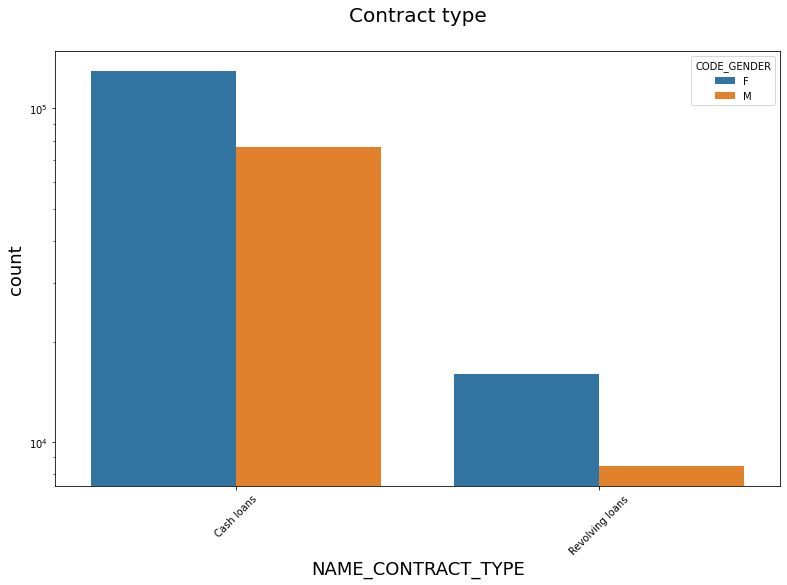

In [150]:
plotit(df0,col='NAME_CONTRACT_TYPE',title='Contract type',hue='CODE_GENDER')

**Points to note:**

1. Cash loan contracts are having more counts than revolving loans
2. Females have majority in both catagories.

## Oraganization type in logarithmic scale

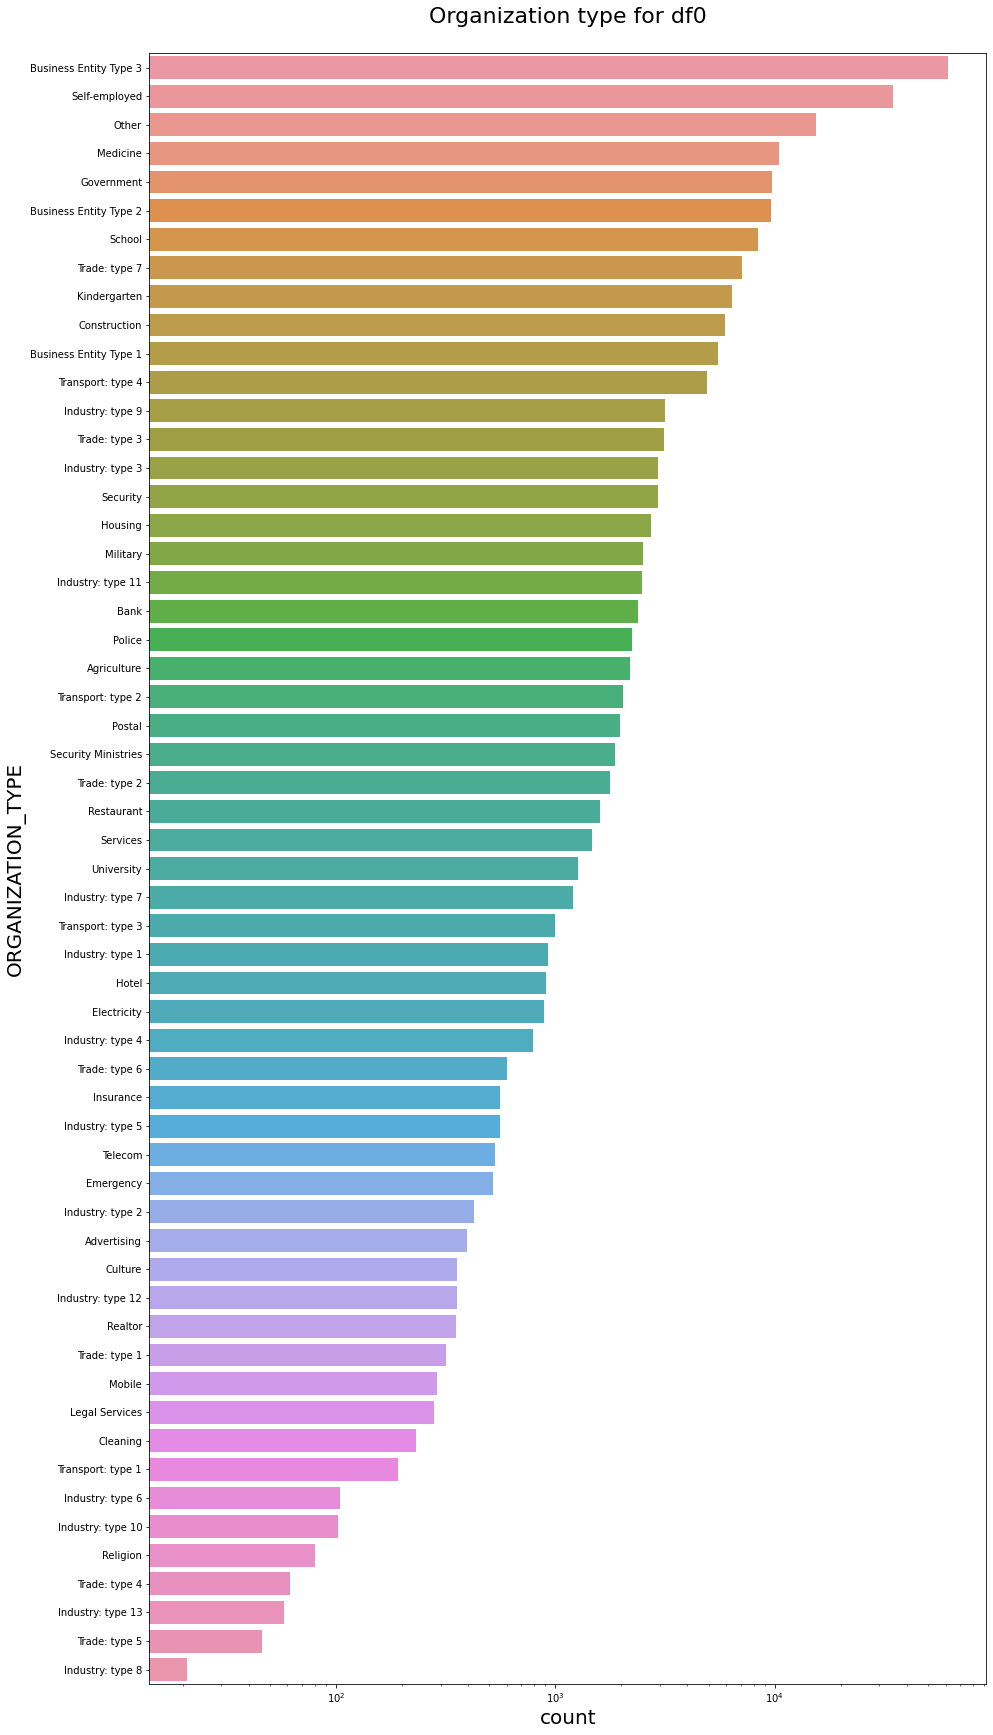

In [151]:
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Organization type for df0")

plt.xscale('log')

sns.countplot(data=df0,y='ORGANIZATION_TYPE',order=df0['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

**Points to note:**

1. Organisations from wich most of the users have applied for loan:
 ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’, ‘Government’, Business entity type 2.
2. Organisations from wich least users have applied for loan:Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


## Analysis for application from target 1
Income Range

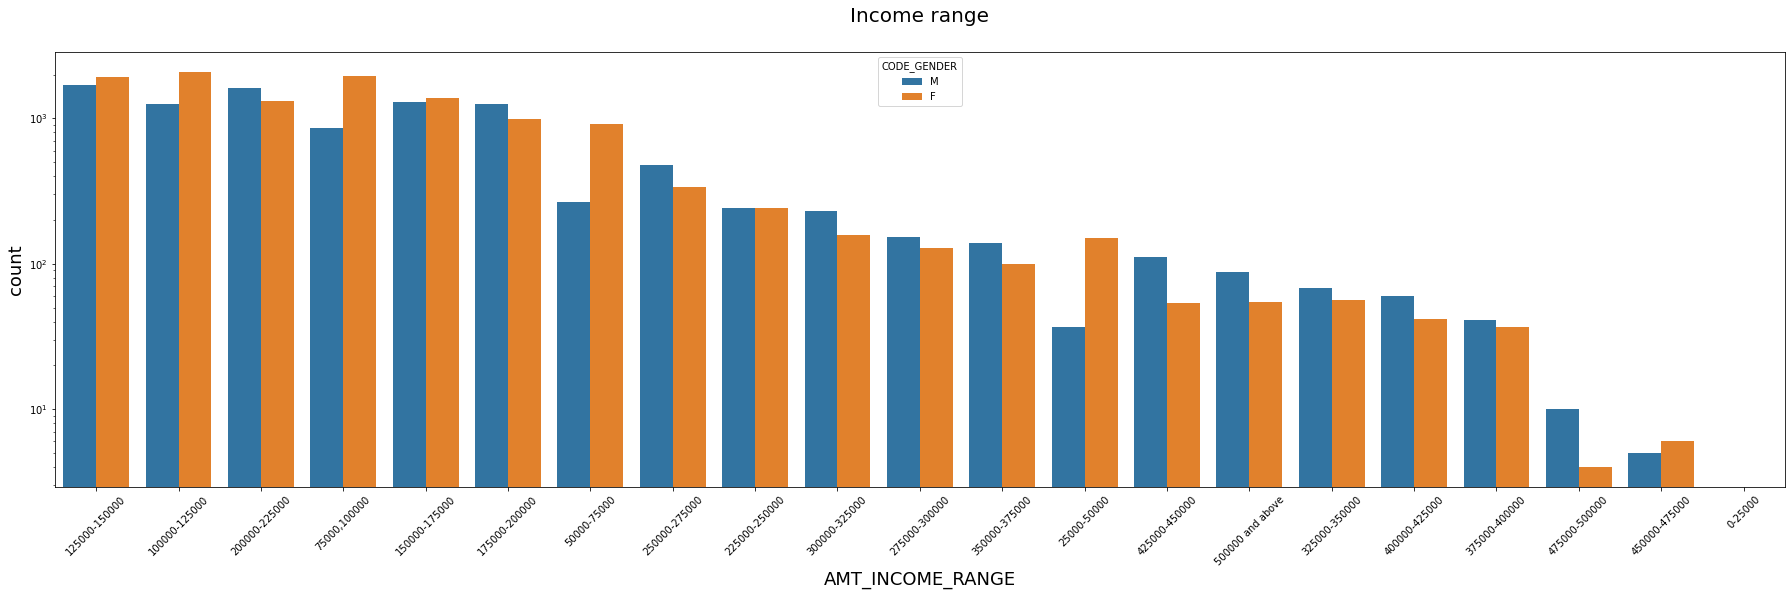

In [152]:
plotit(df1,col='AMT_INCOME_RANGE',title='Income range',hue='CODE_GENDER')

**Points to note:**

1. Male counts are lesser than female.
2. very less count for income range 400000 to 0
3. 100000 to 200000 income range is having more number of credits.


## Income type

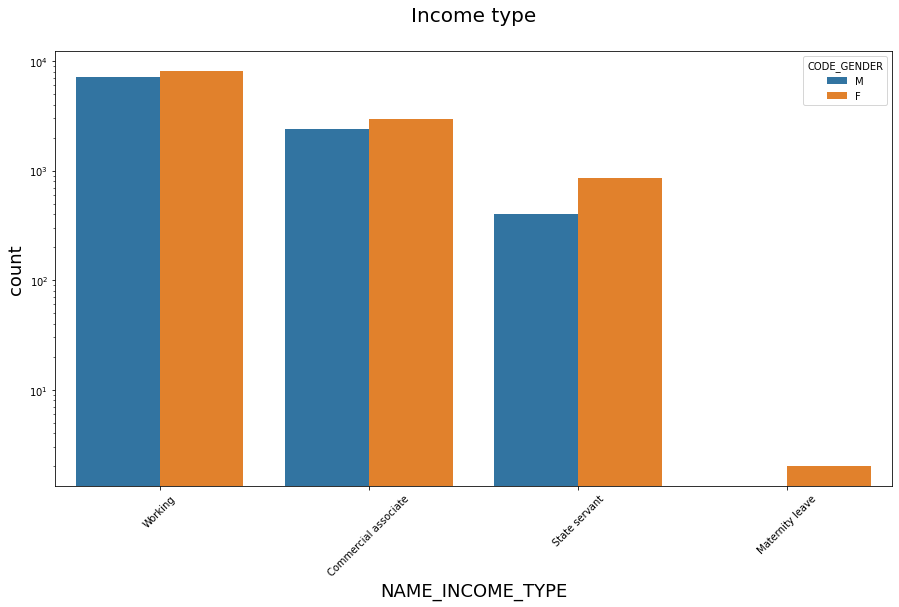

In [153]:
plotit(df1,col='NAME_INCOME_TYPE',title='Income type',hue='CODE_GENDER')

**Points to note:**

1. For ‘working’, ’commercial associate’, and ‘State Servant’ Count is higher than that of Maternity leave.
2. Females are having slightly more credits than Males.
3. ‘Maternity leave’ carries least counts.
4. ‘student’ , ’pensioner’ and ‘Businessman’ are missing from type 1.



Contract type

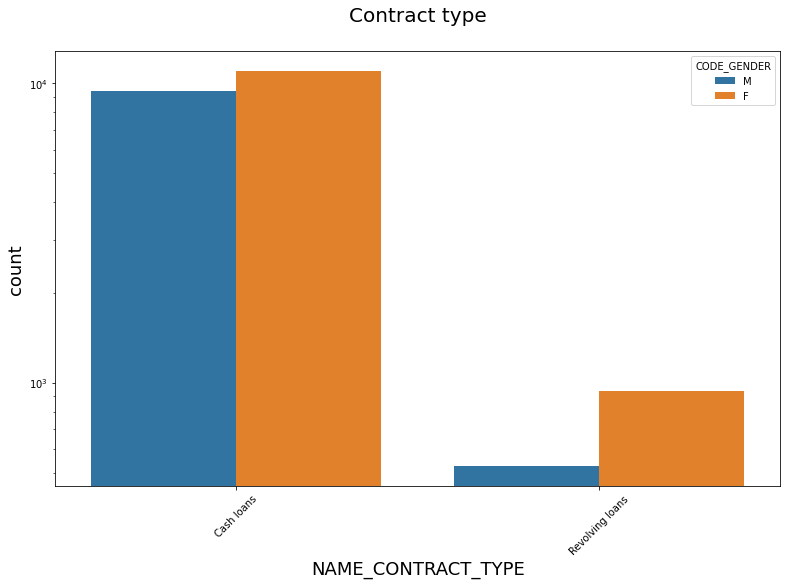

In [154]:
plotit(df1,col='NAME_CONTRACT_TYPE',title='Contract type',hue='CODE_GENDER')

**Points to note:**

1. ‘cash loans’ contract type is having more credits than ‘Revolving loans’.
2. Females are in majority again.
3. For target 1 : Females counts are to high as compared to mens.

## Organisation Type

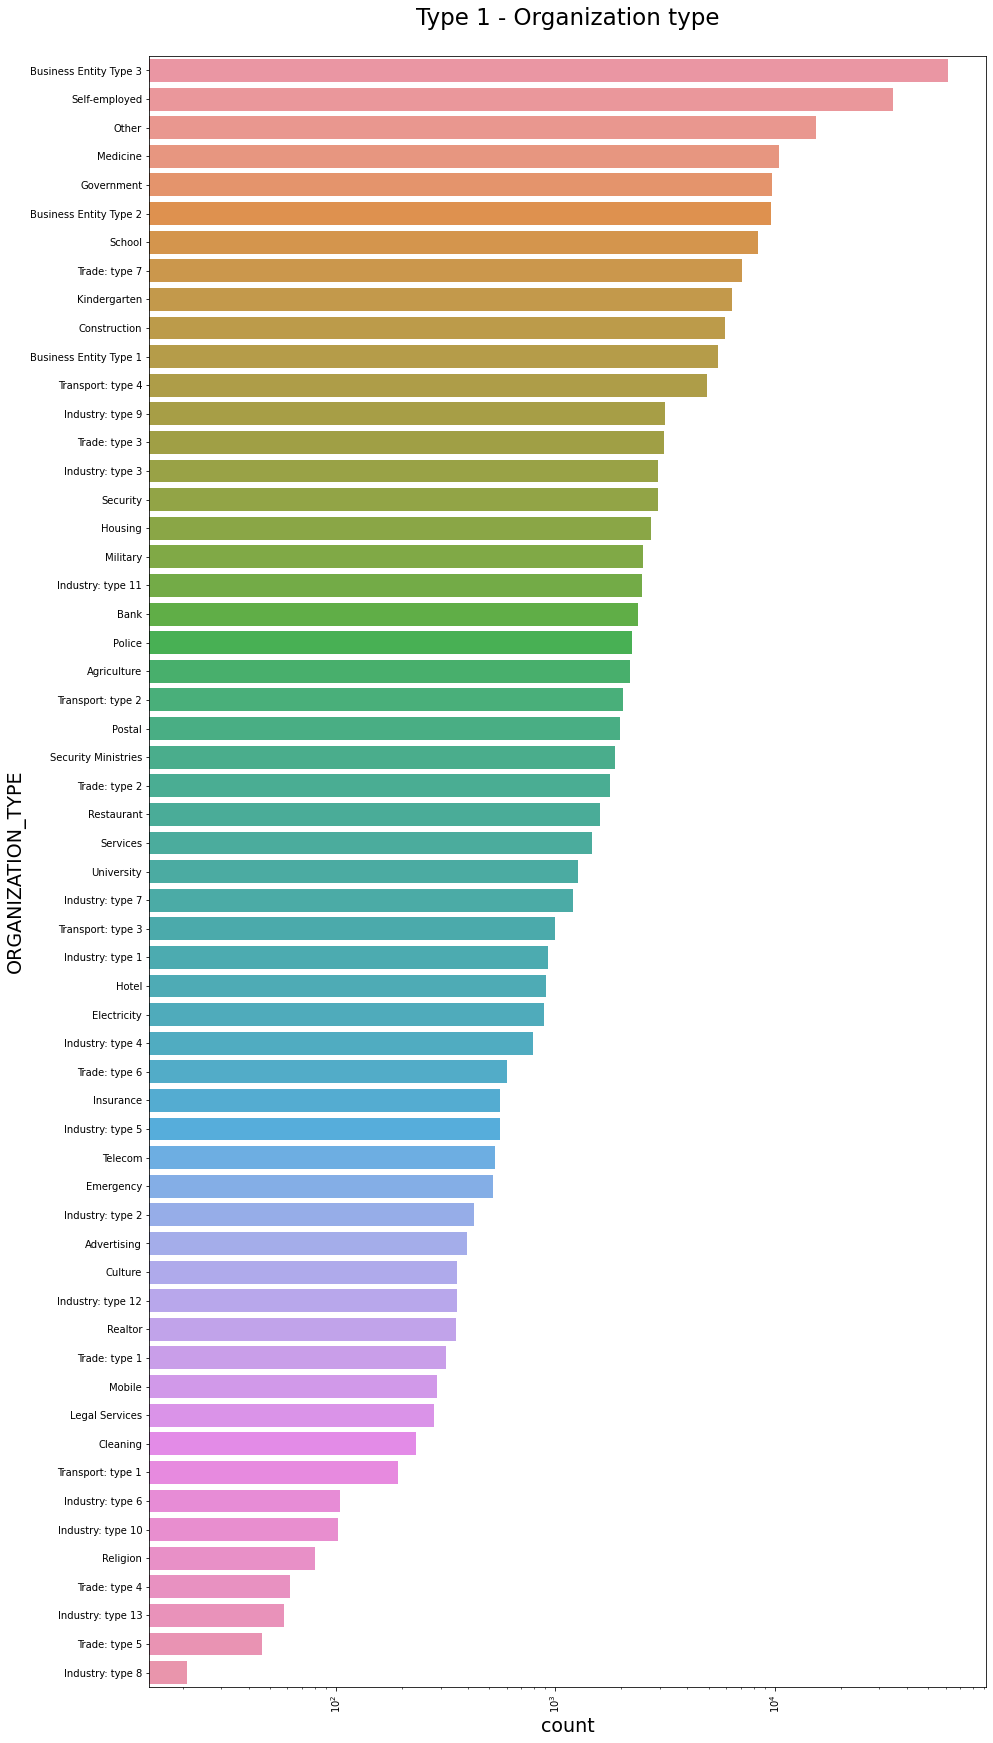

In [155]:
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 19
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 31
plt.title("Type 1 - Organization type")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=df0,y='ORGANIZATION_TYPE',order=df0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

**Points to note:**

1. ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’ has highest counts.
2. Industry type 8,type 6, type 10, religion and  trade type 5, type 4 has lowest count.
3. Results are same as per target 0.

## Finding Correlation for target 0 and 1

In [156]:
df0c=df0.iloc[0:,2:]
df1c=df1.iloc[0:,2:]
t0=df0c.corr(method='spearman')
t1=df1c.corr(method='spearman')

## Correlation for target 0

In [157]:
t0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021945,-0.023652,-0.010791,-0.030579,0.266548,0.030959,0.155523,-0.119163,-0.030156,-0.022815,-0.015464,-0.005564,0.002341,0.007488,0.013298
AMT_INCOME_TOTAL,-0.021945,1.000000,0.403874,0.472202,0.110073,-0.054669,-0.060873,0.040553,-0.036694,0.073495,0.077636,0.159940,0.148257,-0.001021,-0.013868,-0.004771
AMT_CREDIT,-0.023652,0.403874,1.000000,0.826691,0.060703,-0.169027,-0.104250,-0.015320,-0.038192,0.036921,0.015118,0.041686,0.045168,-0.040616,-0.037005,-0.011199
AMT_ANNUITY,-0.010791,0.472202,0.826691,1.000000,0.064328,-0.100291,-0.074648,0.010709,-0.027352,0.032949,0.033435,0.070831,0.069040,-0.019952,-0.024089,-0.008092
REGION_POPULATION_RELATIVE,-0.030579,0.110073,0.060703,0.064328,1.000000,-0.041660,0.000898,-0.042405,-0.010302,0.133214,-0.025292,0.032455,0.056825,-0.049780,-0.034804,-0.007327
DAYS_BIRTH,0.266548,-0.054669,-0.169027,-0.100291,-0.041660,1.000000,0.307777,0.265450,0.083324,0.051293,0.058629,0.038096,0.012778,0.167482,0.111542,0.029006
DAYS_EMPLOYED,0.030959,-0.060873,-0.104250,-0.074648,0.000898,0.307777,1.000000,0.126705,0.106815,0.026436,0.065438,0.086965,0.063531,0.118230,0.125961,0.069572
DAYS_REGISTRATION,0.155523,0.040553,-0.015320,0.010709,-0.042405,0.265450,0.126705,1.000000,0.036787,-0.029558,0.017716,0.015087,0.007710,0.038066,0.047339,0.027230
DAYS_ID_PUBLISH,-0.119163,-0.036694,-0.038192,-0.027352,-0.010302,0.083324,0.106815,0.036787,1.000000,0.008539,0.027302,0.020846,0.008550,0.054877,0.033441,0.001490
HOUR_APPR_PROCESS_START,-0.030156,0.073495,0.036921,0.032949,0.133214,0.051293,0.026436,-0.029558,0.008539,1.000000,0.051745,0.067340,0.053798,0.011289,-0.005975,-0.010726


## Correlation - Target 1

In [158]:
t1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


## Preparing a function for heatmap generation

In [159]:
def tc(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    sns.heatmap(data, cmap="RdYlGn",annot=False)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()



## Correlation in target 0

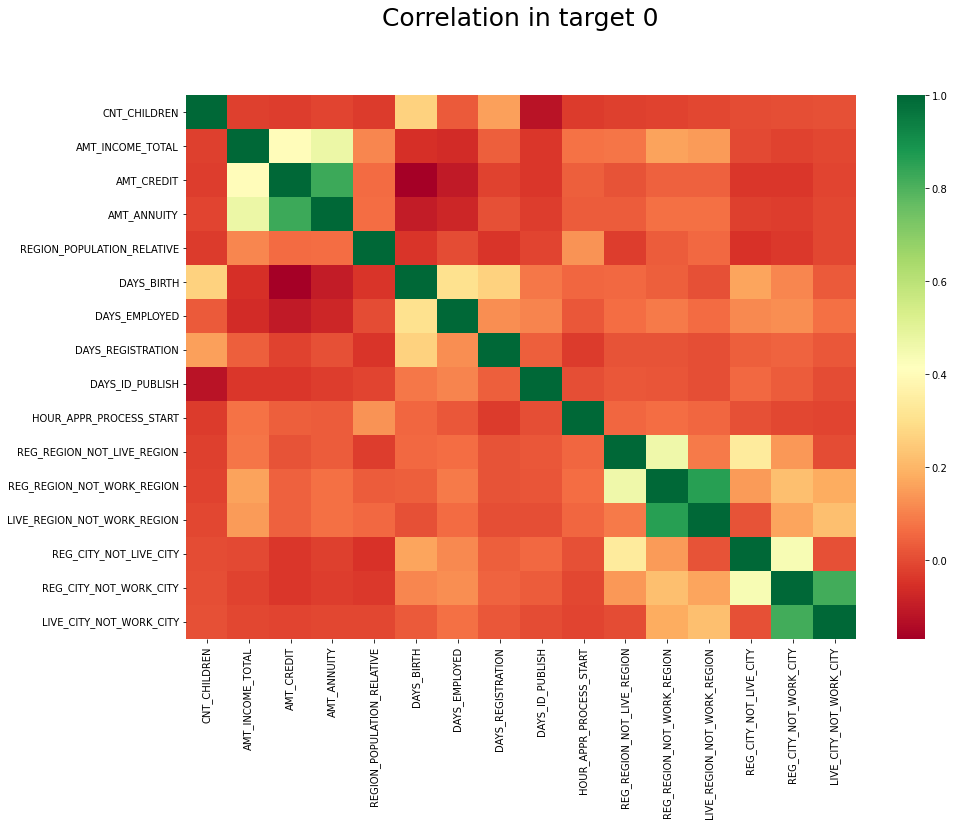

In [160]:
tc(data=t0,title='Correlation in target 0')

**Points to note:**

1. Number of children client have is inversely proportional to the credit amount, means Credit amount is lesser for high children count client have and vice-versa.
2. Credit amount is inversely proportional to the date of birth, which means Credit amount is lower for high age and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means less income for more children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

Correlation in Target 1

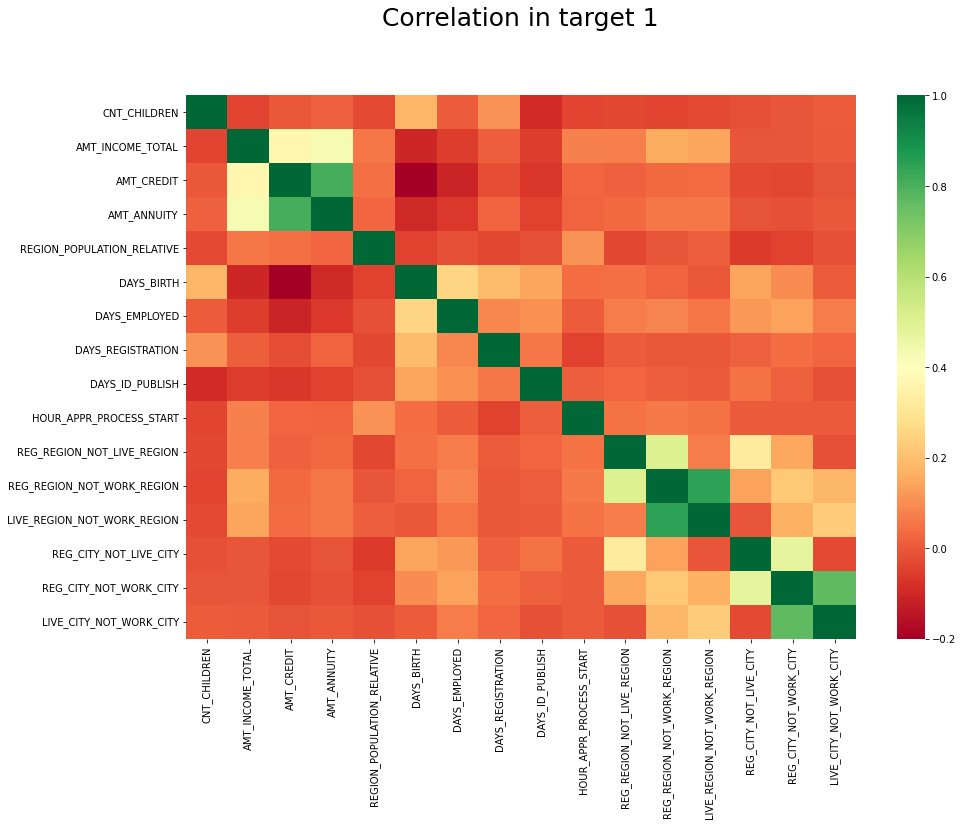

In [161]:
tc(data=t1,title='Correlation in target 1')

## Points to note:

1. Target 1 has very simillar results as target 0. 

## Univariate Variables Analysis


Income Amount


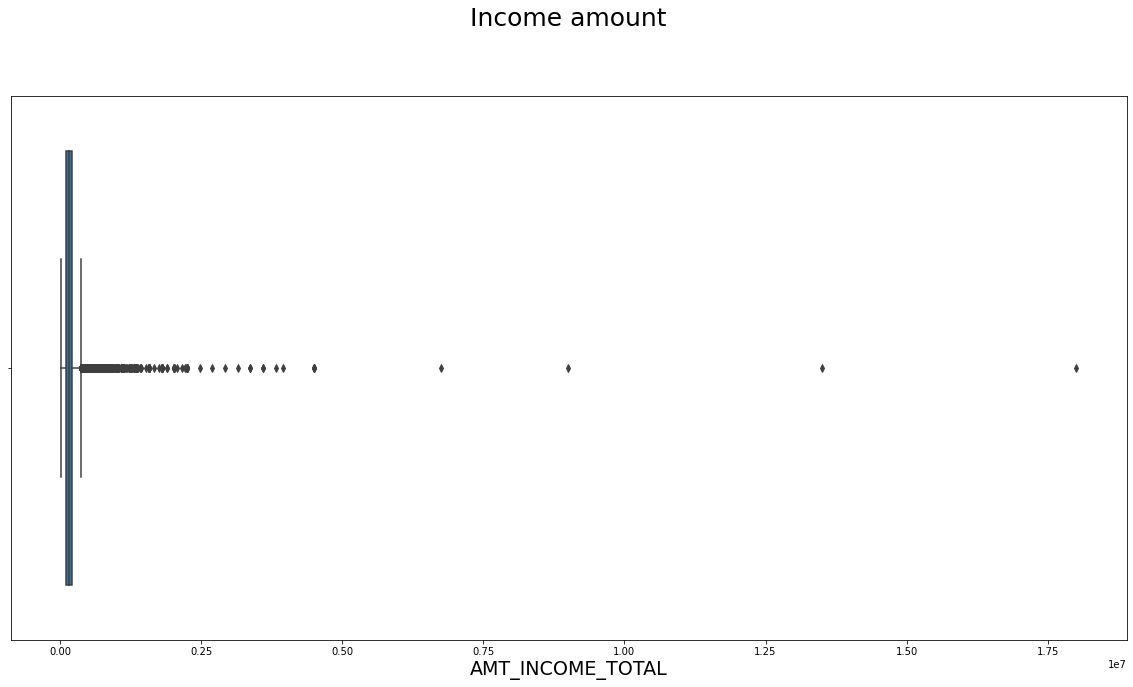

In [162]:
plt.figure(figsize=(20,10))
plt.title('Income amount')
sns.boxplot(x="AMT_INCOME_TOTAL", data=df0)

Points to note:

1. Outliers are present.
2. IQR is too small.

credit amount

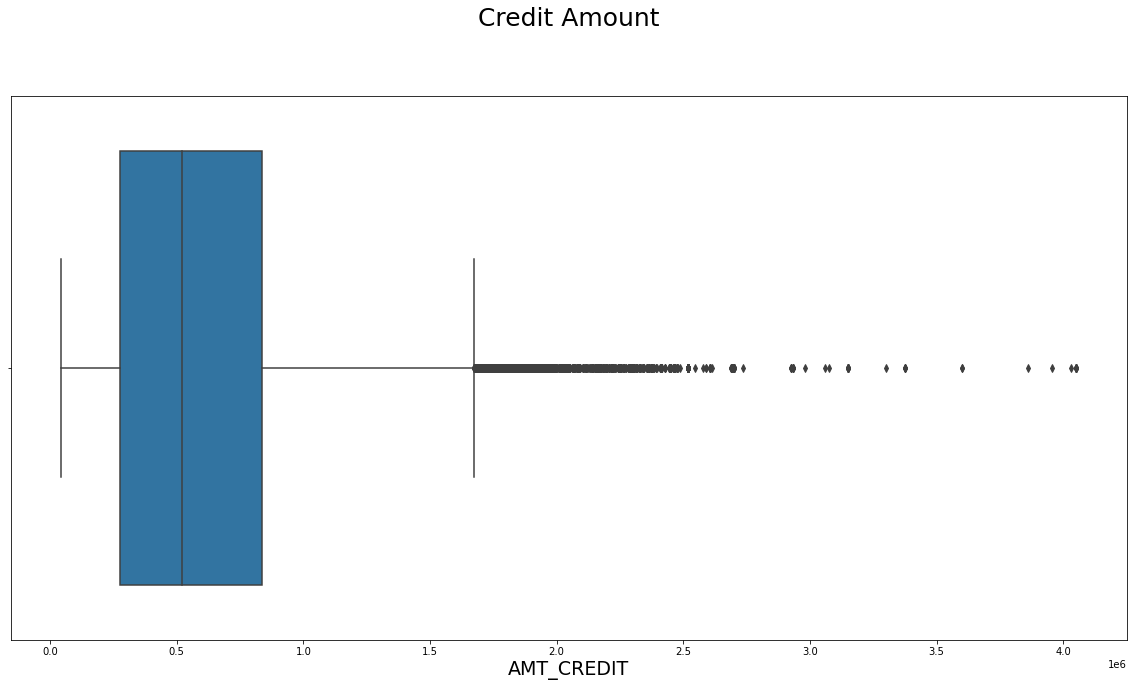

In [163]:
plt.figure(figsize=(20,10))
plt.title('Credit Amount')
sns.boxplot(x="AMT_CREDIT", data=df0)

Points to note:

1. Outliers are present.
2. More credits of clients are present in the median to third quartile side.

## Annuity Amount

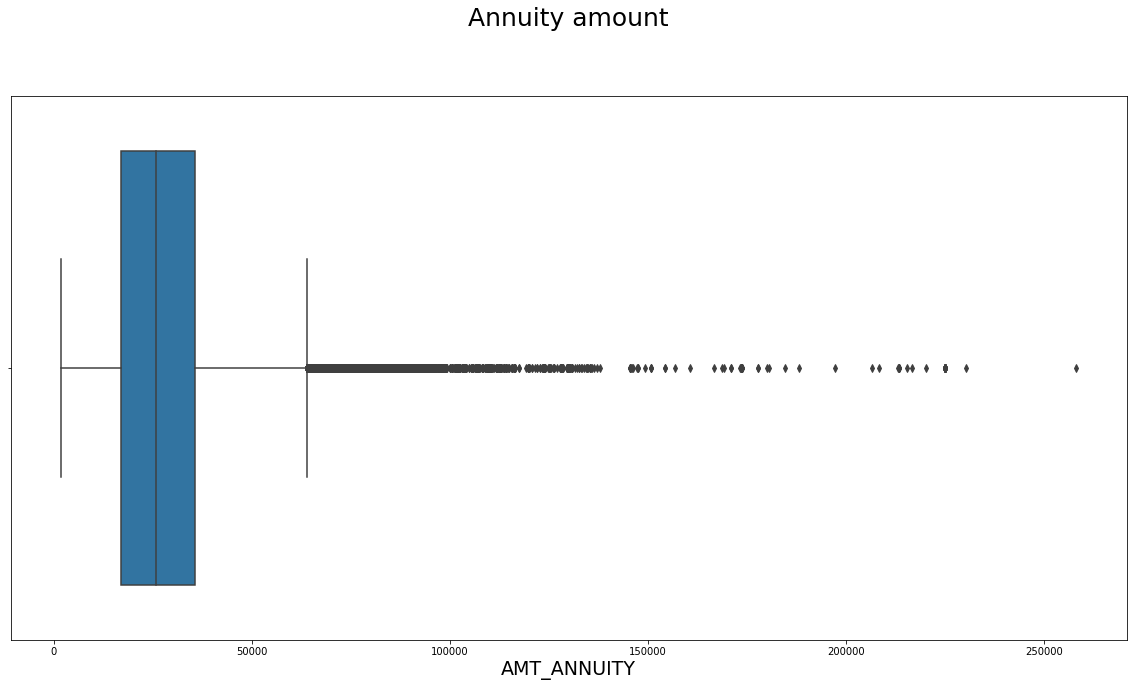

In [164]:
plt.figure(figsize=(20,10))
plt.title('Annuity amount')
sns.boxplot(x="AMT_ANNUITY", data=df0)

**Points to note:**

1. Outliers are present.
2. Both quartiles are equal for annuity amount which means, annuity clients are equal in both quartiles.


## For Target 1 - Finding any outliers

**Income Amount**

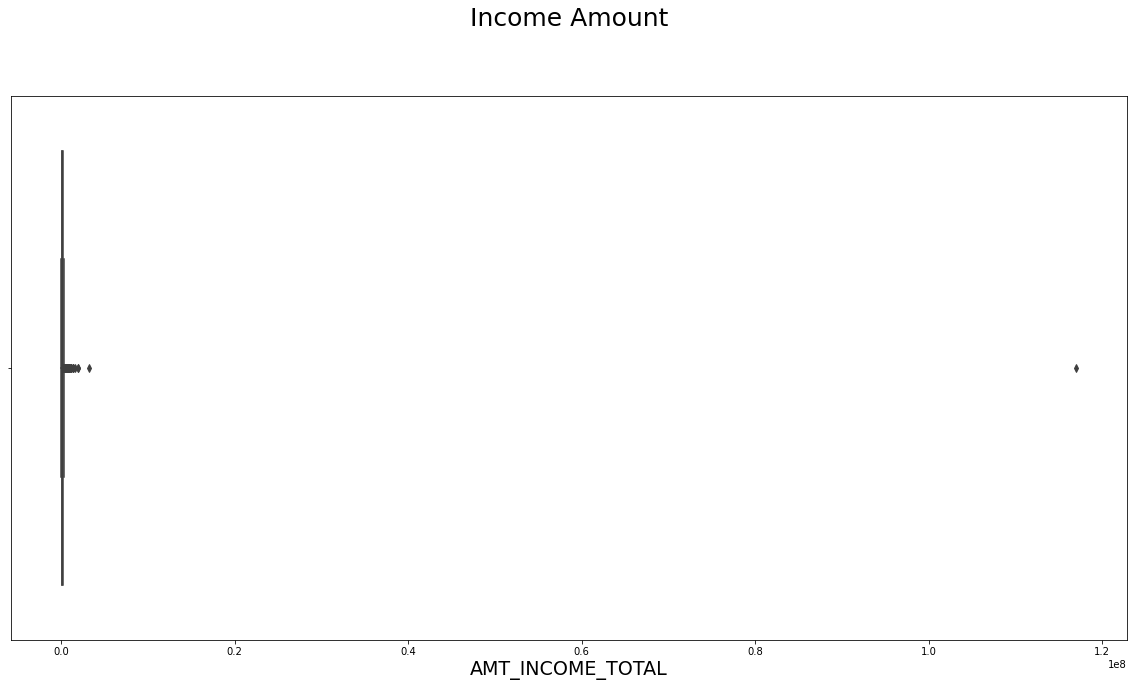

In [165]:
plt.figure(figsize=(20,10))
plt.title('Income Amount')
sns.boxplot(x="AMT_INCOME_TOTAL", data=df1)

Point to note

1. Outliers are present.
2. IQR is too small.

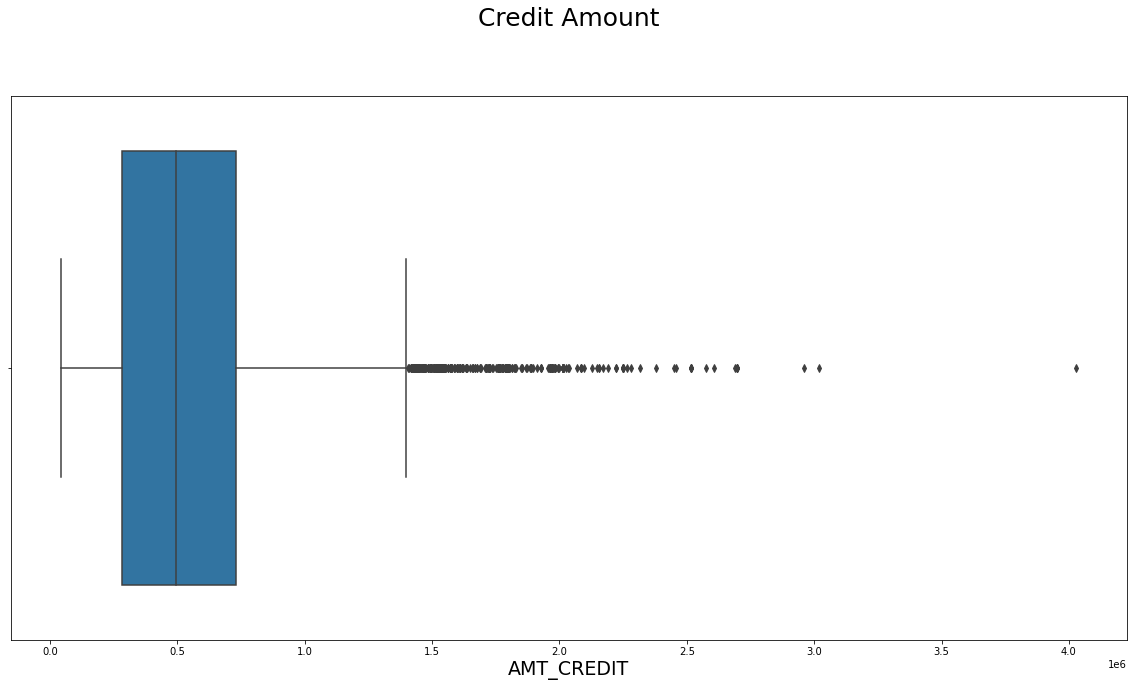

In [166]:
# Distribution of credit amount
plt.figure(figsize=(20,10))
plt.title('Credit Amount')
sns.boxplot(x="AMT_CREDIT", data=df1)


Pooints to note:

1. Outliers are present
2. The first quartile is smaller than third quartile hence third quartile has most of the credits.

## Annuity amount

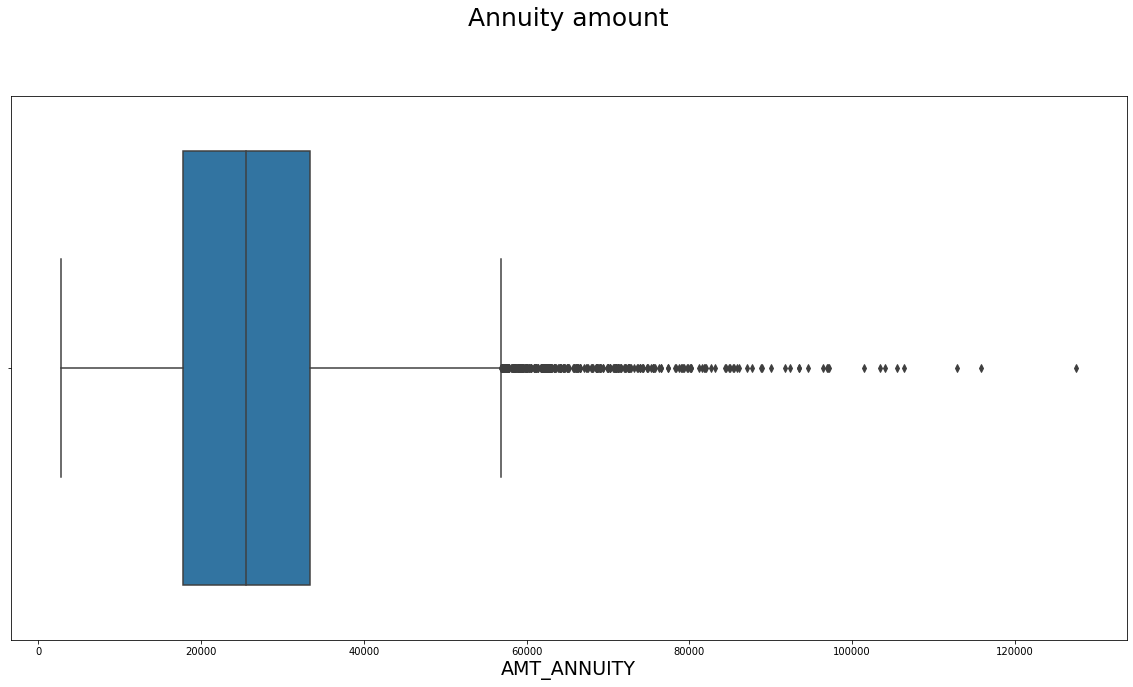

In [167]:
plt.figure(figsize=(20,10))
plt.title('Annuity amount')
sns.boxplot(x="AMT_ANNUITY", data=df1)

**Points to note:**

1. Outliers are present.
2. Both quartiles are equal.

**Bivariate analysis for numerical variables**

**For Target 0**

Credit amount

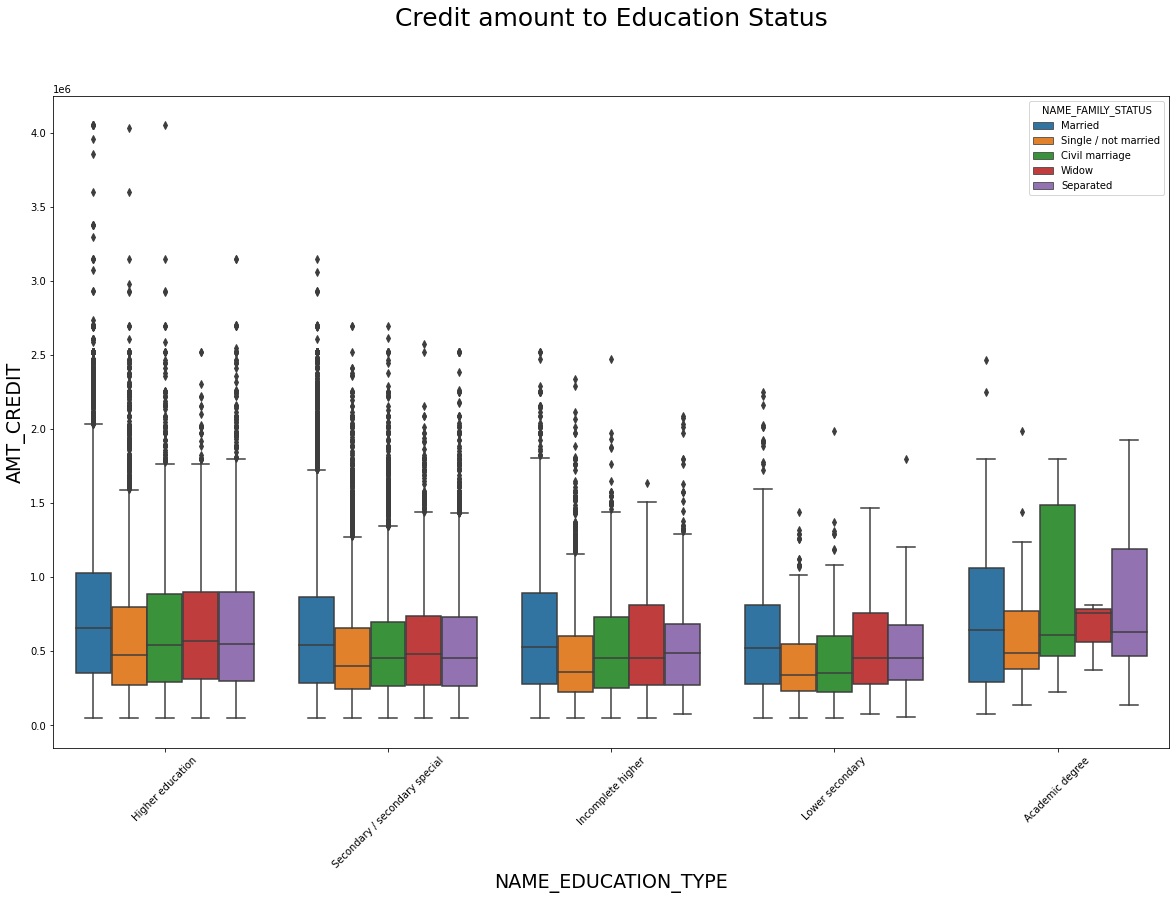

In [168]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
sns.boxplot(data =df0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount to Education Status')
plt.show()

**Points to note:**
1. 'civil marriage', 'marriage' and 'separated' are having higher credits
2. 'marriage', 'single' and 'civil marriage' have more outliers
3. Civil marriage for Academic degree are having more credits in third quartile.

# Income Amount

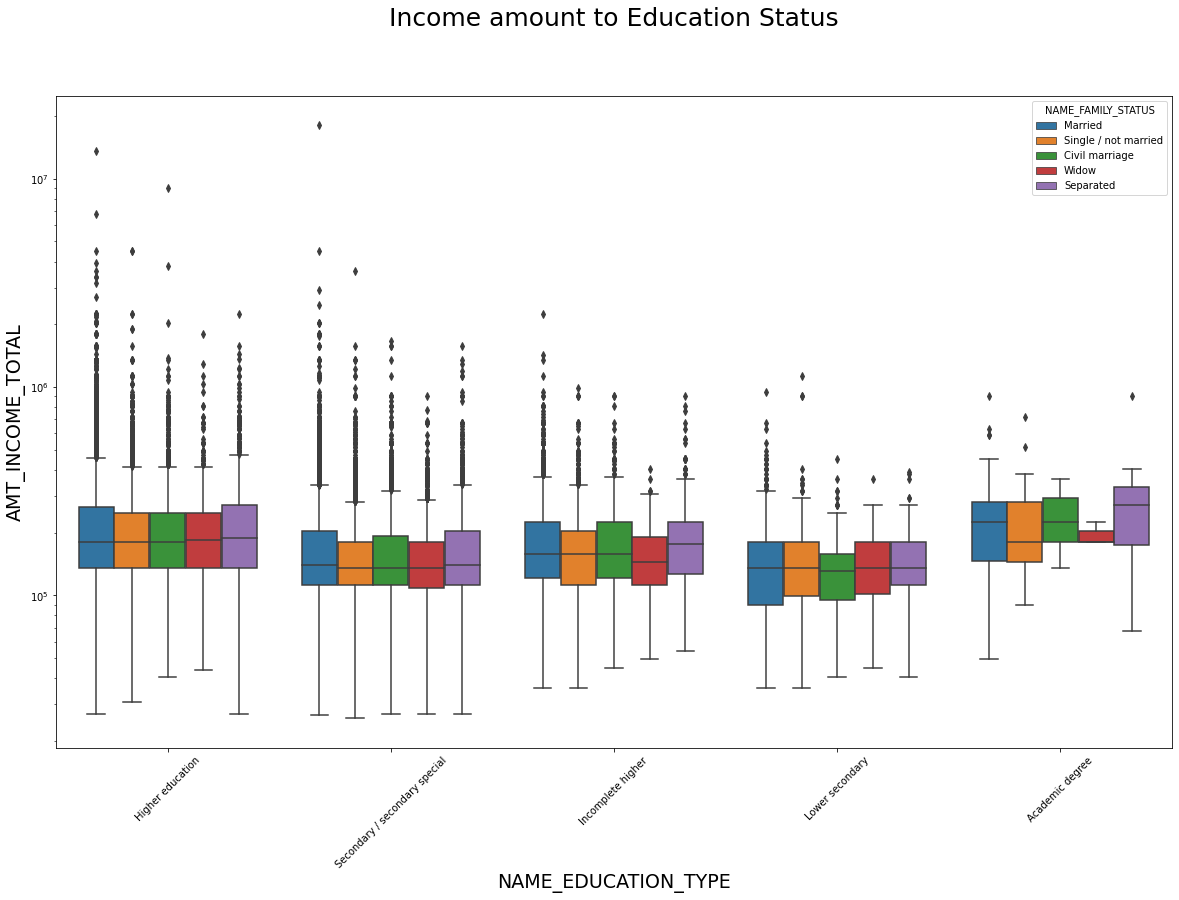

In [170]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount to Education Status')
plt.show()

**Point to note:**
1. For 'Higher education' income amount is mostly equal to family status. It contains many outliers. 
2. Lower secondary of civil marriage family status are having less income amount compared to others.

## For Target 1

**Credit amount**

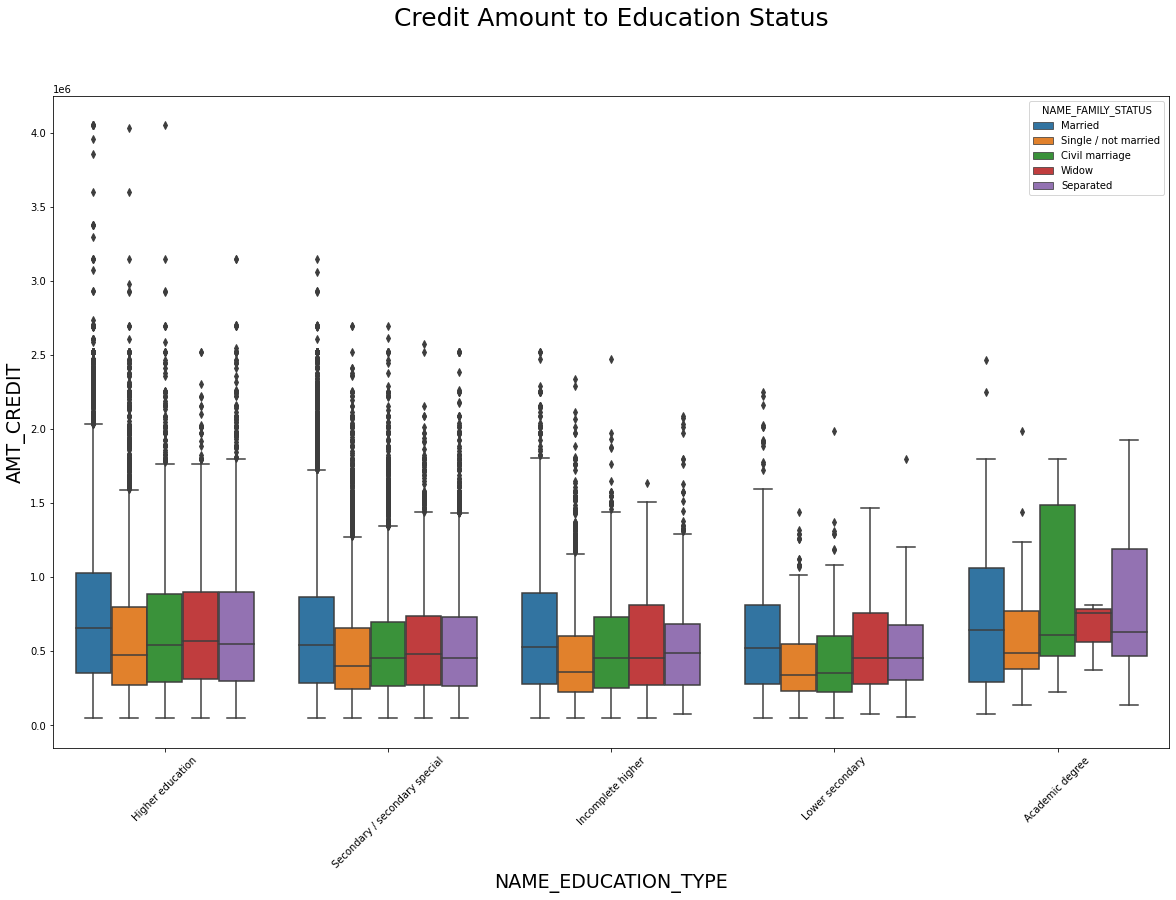

In [171]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
sns.boxplot(data =df0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount to Education Status')
plt.show()

**Points to note:**
1. Target 0 and target 1 both are having same results.
2. 'civil marriage', 'marriage' and 'separated' have higher credits than others
3. 'Higher education' and 'Secondary' have most of the outliers.
4. Civil marriage for Academic degree has most of credits in third quartile.

## Income Amount

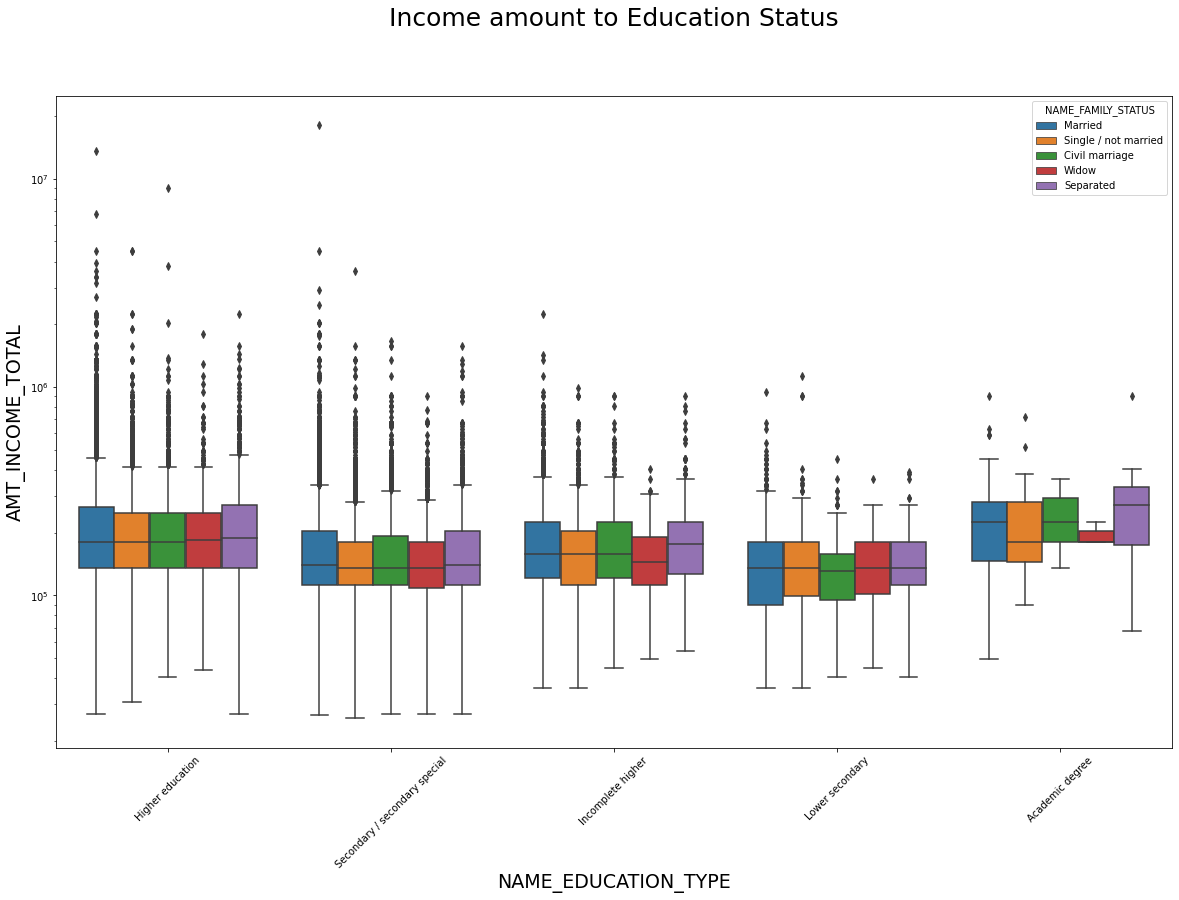

In [172]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount to Education Status')
plt.show()

**Points to note:**
1. Target0 and target 1 are mostly same.
2. For 'Higher education' the income amount is mostly equal with family status. 
2. Less outlier for Academic degree but income amount is little higher that Higher education.
3. Lower secondary are having less income amount than others.

## Read Previous Application

In [173]:
pdf=pd.read_csv(r"/content/drive/MyDrive/Credit EDA Case Study/previous_application.csv")

## Clean missing data
drop column with null values more than 50%

In [174]:
emptycol1=pdf.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.5*len(emptycol1))]
len(emptycol1)

15

Drop 15 columns

In [175]:
emptycol1 = list(emptycol1[emptycol1.values>=0.5].index)
pdf.drop(labels=emptycol1,axis=1,inplace=True)

pdf.shape

(1670214, 22)

Drop columns with 'XNA' and 'XAP'

In [176]:
pdf=pdf.drop(pdf[pdf['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pdf=pdf.drop(pdf[pdf['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

pdf.shape

(69635, 22)

## Join Application dataset with previous appliaction dataset

In [177]:
final=pd.merge(left=appl,right=pdf,how='inner',on='SK_ID_CURR',suffixes='_x')

## Rename columns for better usability

In [178]:
final = final.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



## Remove extra columns

In [179]:
final.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

## Performing univariate analysis

**Contract Status**

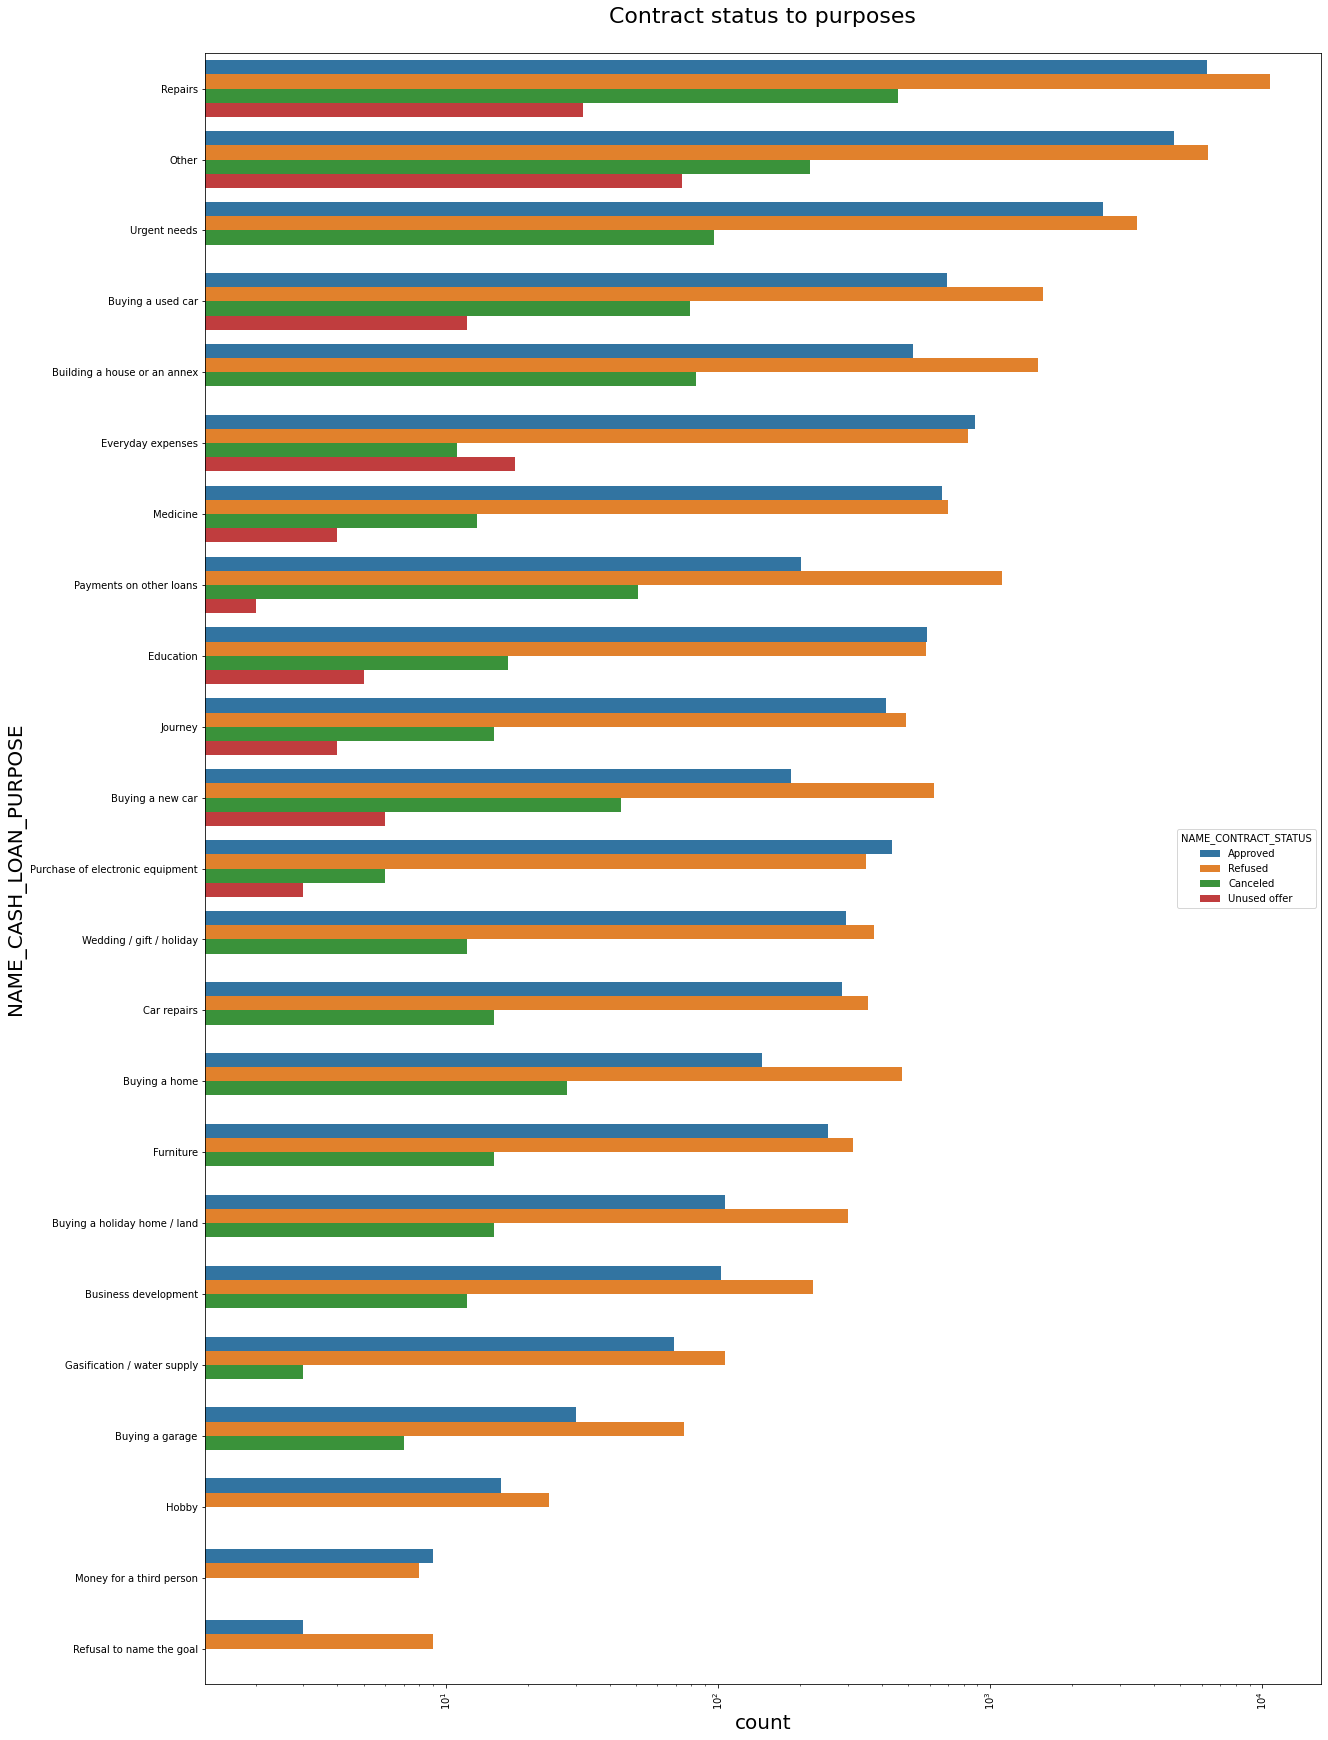

In [180]:

plt.figure(figsize=(20,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Contract status to purposes')
ax = sns.countplot(data = final, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

**Points to note:**

1. 'repairs' has most of the rejections
2. education purposes there are equal approves and rejection
3. Paying other loans and buying a new car is having higher rejection than that of approves.

## Contract status

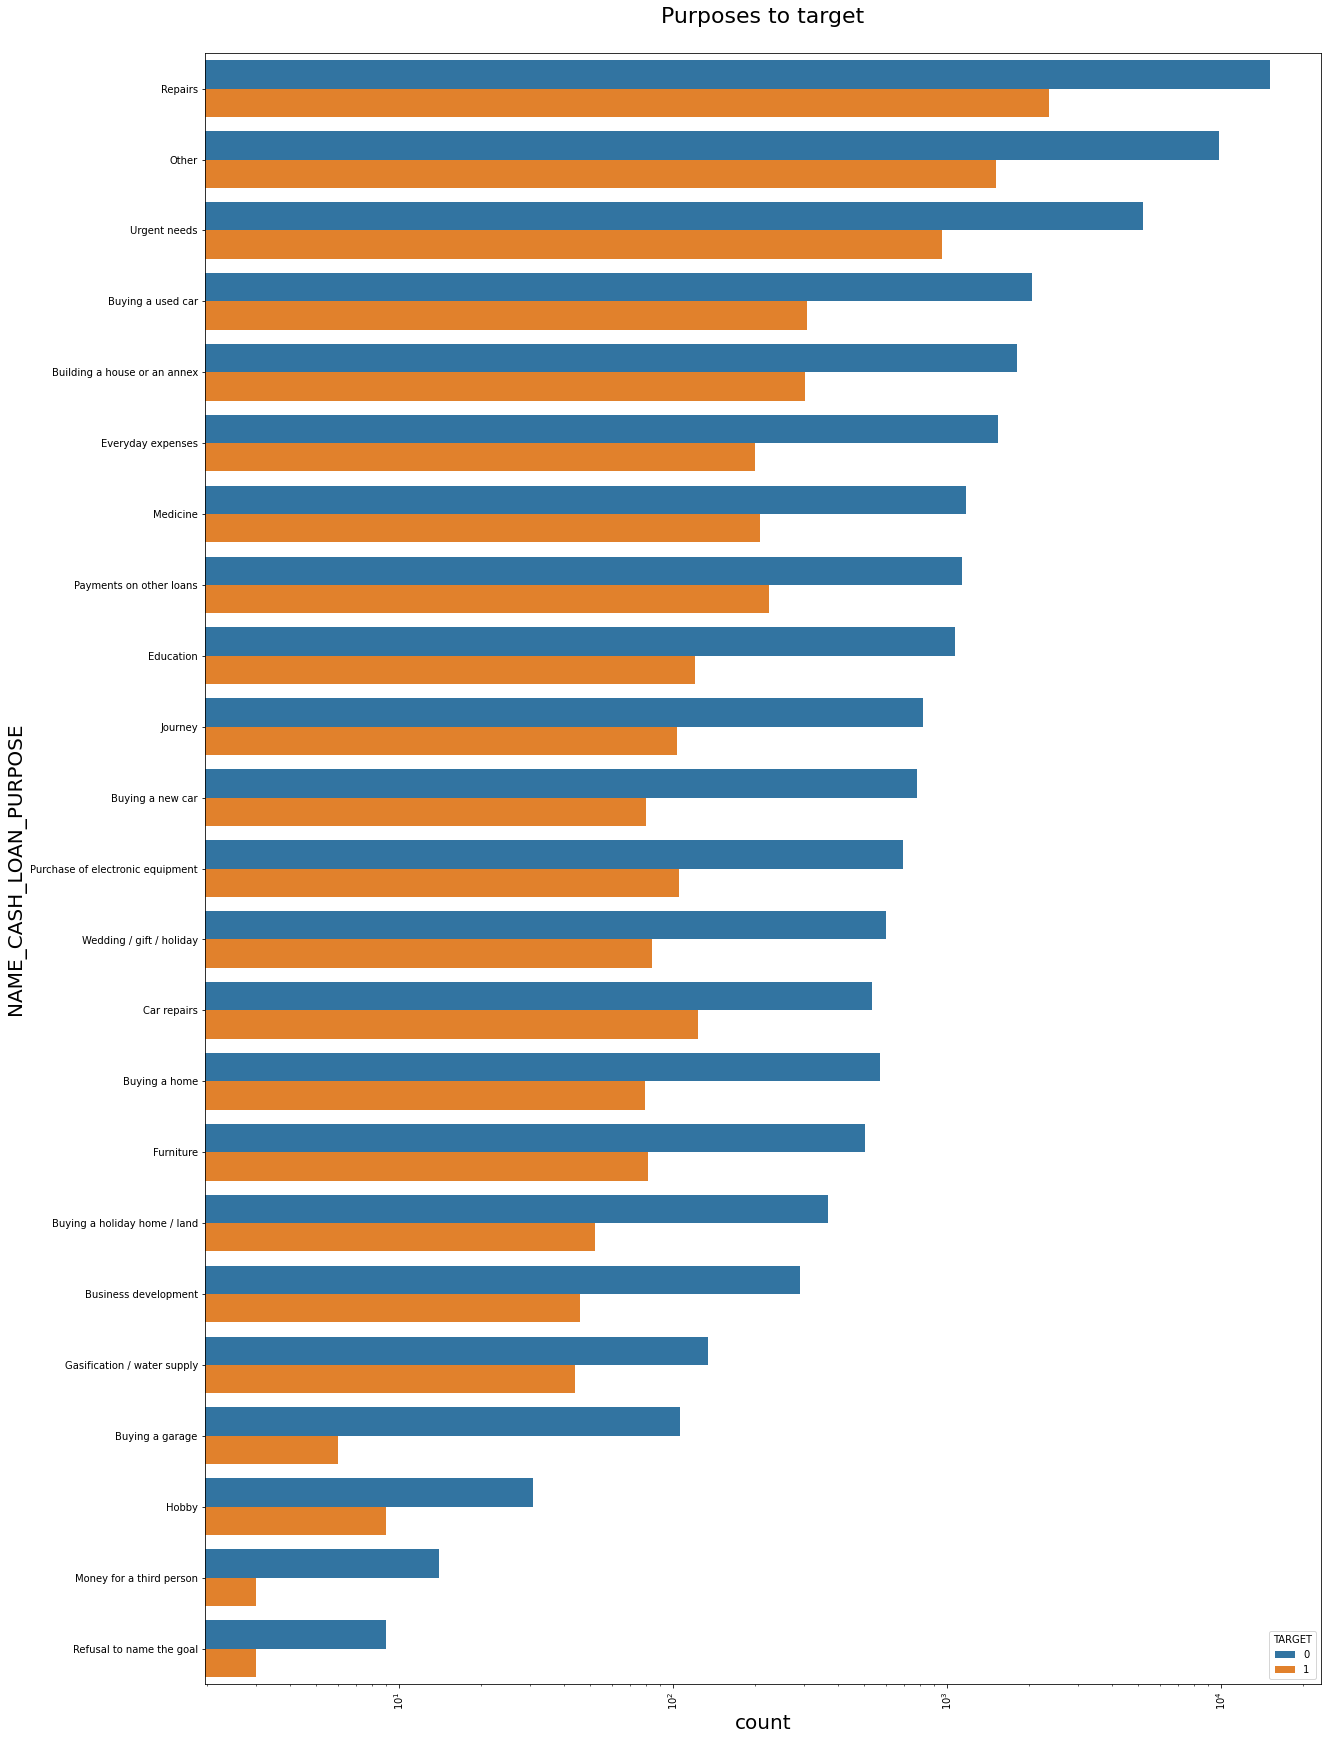

In [181]:
plt.figure(figsize=(20,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Purposes to target')
ax = sns.countplot(data = final, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

**Points to note:**

1. 'Repairs' are facing difficulites in payment on time.
2. 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' are paying loans at high rate and they are not facing any dificulties. 
Hence loan can be given for above mentioned reasons as it will benifit the organisation.

## Performing bivariate analysis

**Credit amount**

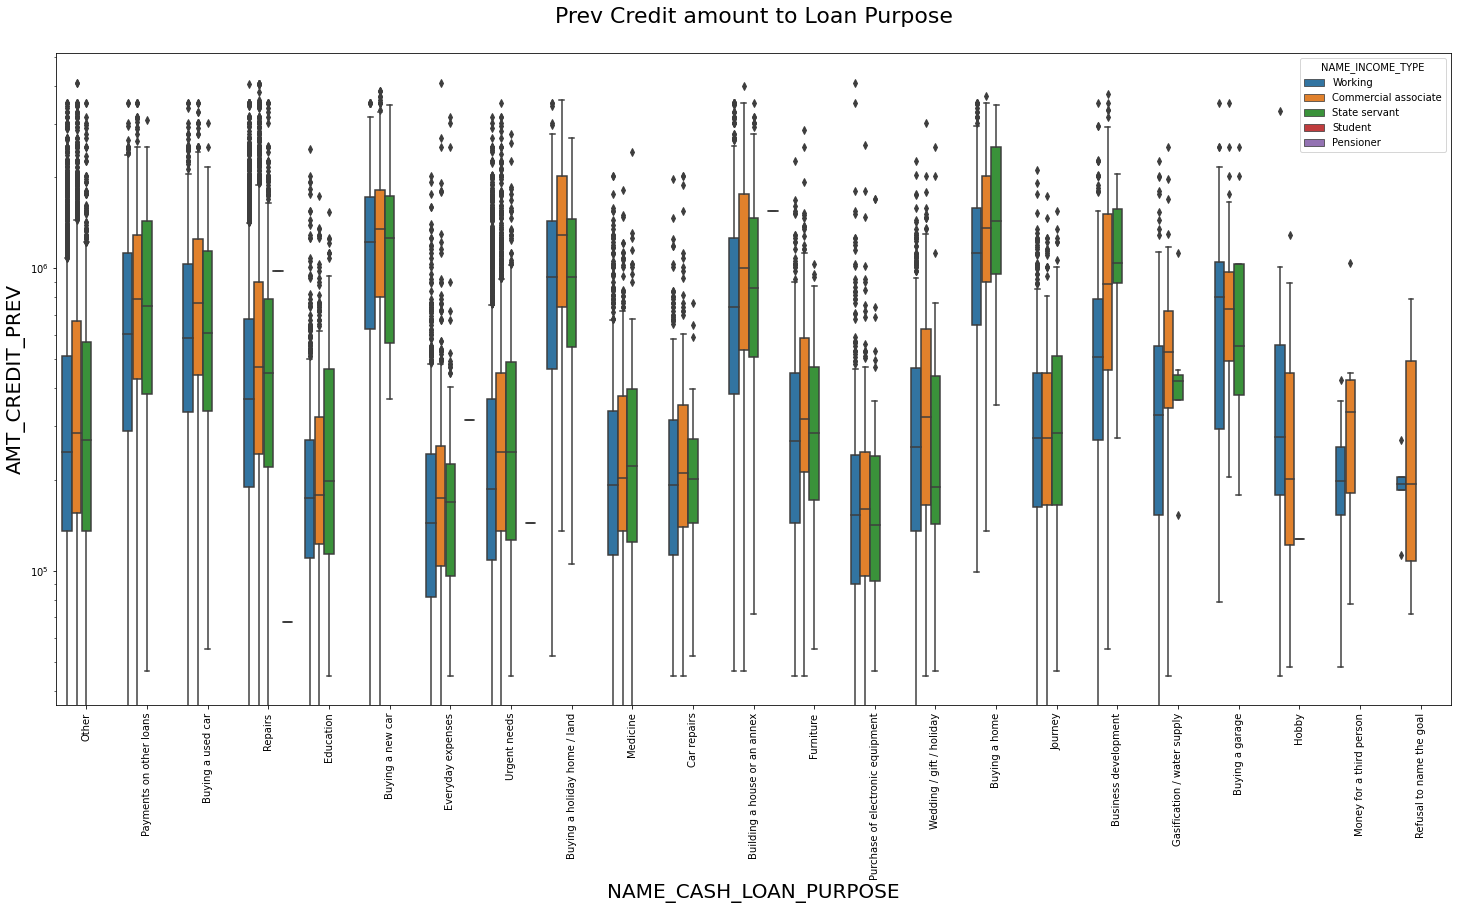

In [182]:
plt.figure(figsize=(25,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =final, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount to Loan Purpose')
plt.show()

**Points to note:**

1. 'Buying a home','Buying a land','Buying a new car' and'Building a house' are having higher credit ammount.
2. State servants have high applicants rate.
3. Money for third person or a Hobby have less applicants rate.

**Credit amount prev to Housing type**

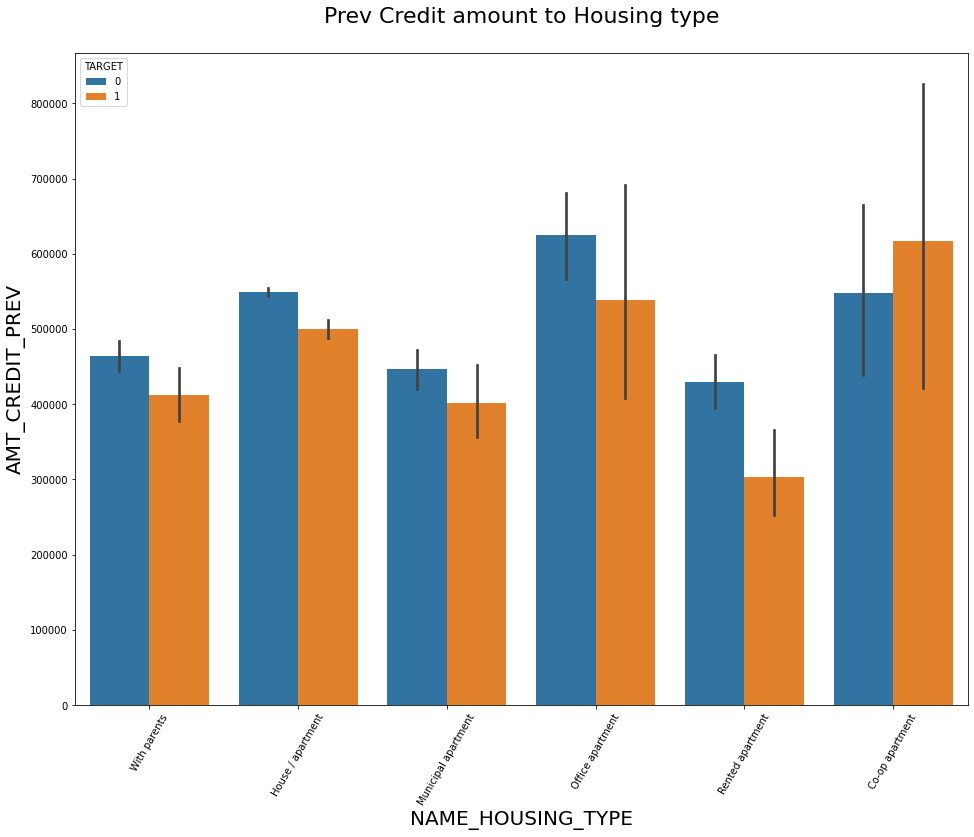

In [183]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=60)
sns.barplot(data =final, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount to Housing type')
plt.show()

Points to note: 
1. Housing type, office appartment are having higher credit of target 0 and co-op apartment is having higher credit of target 1.
2. Bank should avoid giving loans to housing type of co-op apartment because of difficulties in payment.
3. Housing type with parents or House\appartment or miuncipal appartment are the areas where banks should pay their attention for successful payments.

# Conclusion

1. Housing type 'With parents' should be the ideal customer and banks should focus on getting customers from this area as they have very less payment failures. 

2. Contract type 'Student' ,'pensioner' and 'Businessman' with housing type other than 'Co-op apartment' is the area where bank should put more attension for successful payments.

3. Income type 'Working' should not be foucssed much as for gaining new customers from this area as they have most of unsuccessfull payments.

4. Loan purpose 'Repair' is having higher number of unsuccessful payments this category should also be avoided for giving loans.


